<a href="https://colab.research.google.com/github/PranayaVuppala/AqiPrediction/blob/main/AqiIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/AqIndex.csv")
print(df.head())
print(df.isnull().sum())
print(df.info())

  Country           State       City                         Station  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

    Latitude  Longitude          Last Update Pollutant  Min  Max  Avg  AQI  \
0  16.515083  80.518167  20-11-2023 12:00:00     PM2.5  NaN  NaN  NaN  NaN   
1  16.515083  80.518167  20-11-2023 12:00:00      PM10  NaN  NaN  NaN  NaN   
2  16.515083  80.518167  20-11-2023 12:00:00       SO2  NaN  NaN  NaN  NaN   
3  16.515083  80.518167  20-11-2023 12:00:00        CO  NaN  NaN  NaN  NaN   
4  16.515083  80.518167  20-11-2023 12:00:00     OZONE  NaN  NaN  NaN  NaN   

  Predominant Parameter  
0                   NaN  
1                   NaN  
2                   

In [ ]:
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
print(df.isnull().sum())

Country                  0
State                    0
City                     0
Station                  0
Latitude                 0
Longitude                0
Last Update              0
Pollutant                0
Min                      0
Max                      0
Avg                      0
AQI                      0
Predominant Parameter    0
dtype: int64


In [ ]:
print(df.describe())
print(df['Country'].value_counts())
print(df['State'].value_counts())
print(df['City'].value_counts())
print(df['Pollutant'].value_counts())

          Latitude    Longitude          Min          Max          Avg  \
count  3285.000000  3285.000000  3285.000000  3285.000000  3285.000000   
mean     22.795529    78.455119    34.095269   100.117455    60.659054   
std       5.416659     4.800781    44.156667   110.883612    73.399435   
min       8.514909    70.909168     1.000000     1.000000     1.000000   
25%      19.063214    75.467934     6.000000    21.000000    13.000000   
50%      23.500160    77.296291    18.000000    67.000000    35.000000   
75%      27.213494    80.262850    39.000000   119.000000    71.000000   
max      34.066206    94.636574   357.000000   500.000000   419.000000   

               AQI  
count  3285.000000  
mean    162.007890  
std      95.314515  
min      15.000000  
25%      87.000000  
50%     145.000000  
75%     227.000000  
max     419.000000  
Country
India    3285
Name: count, dtype: int64
State
Maharashtra         569
Uttar_Pradesh       359
Rajasthan           313
Karnataka         

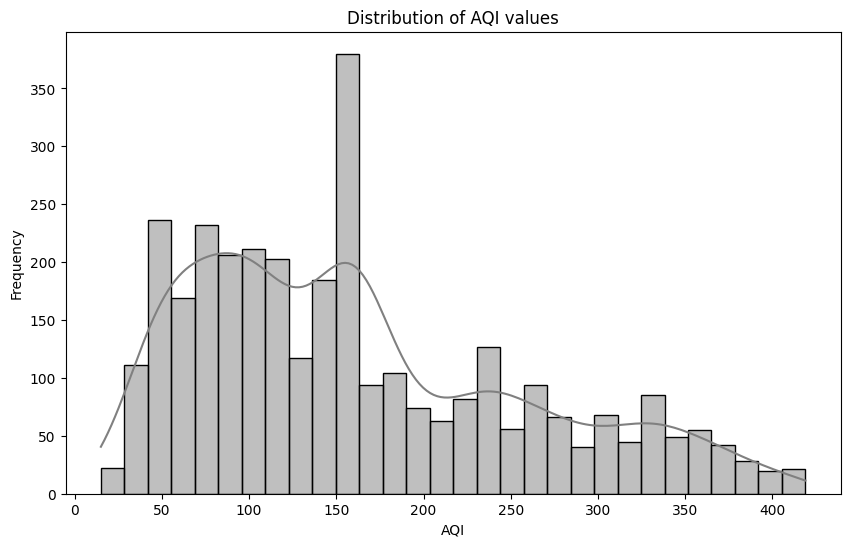

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True,color='grey')
plt.title('Distribution of AQI values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

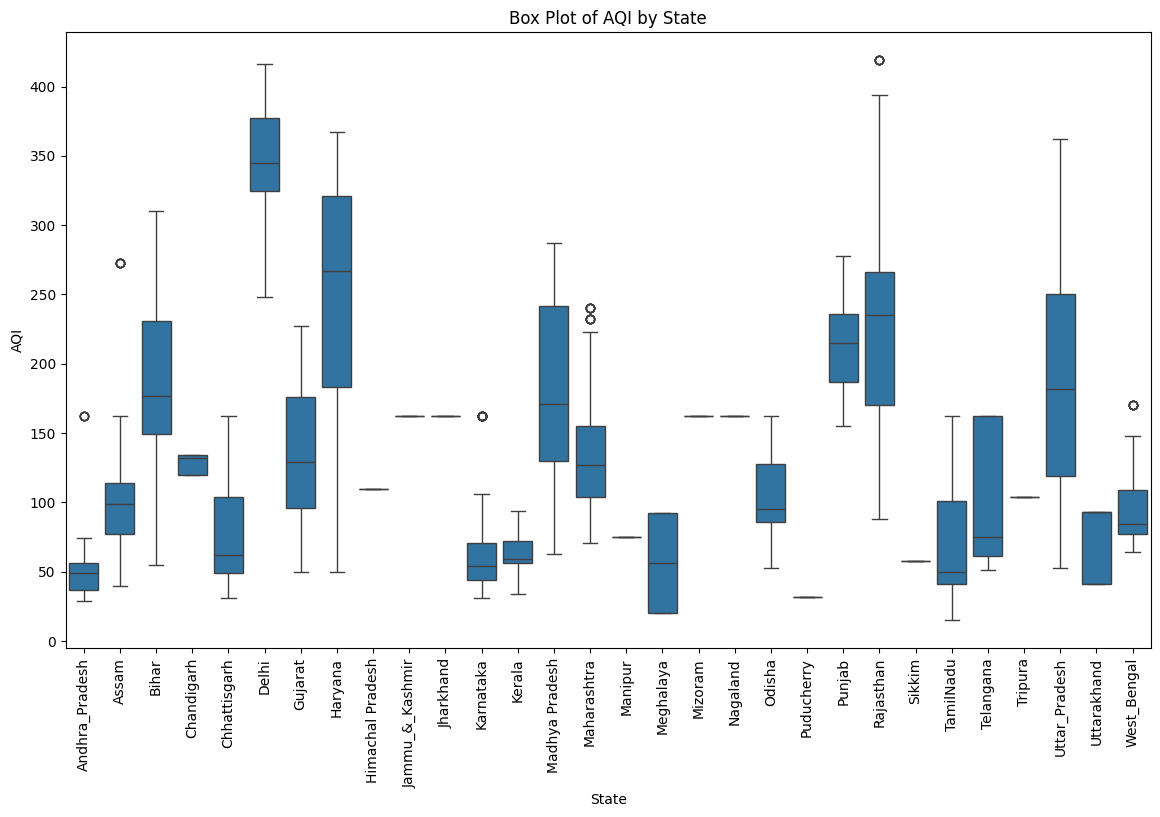

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='AQI', data=df)
plt.title('Box Plot of AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

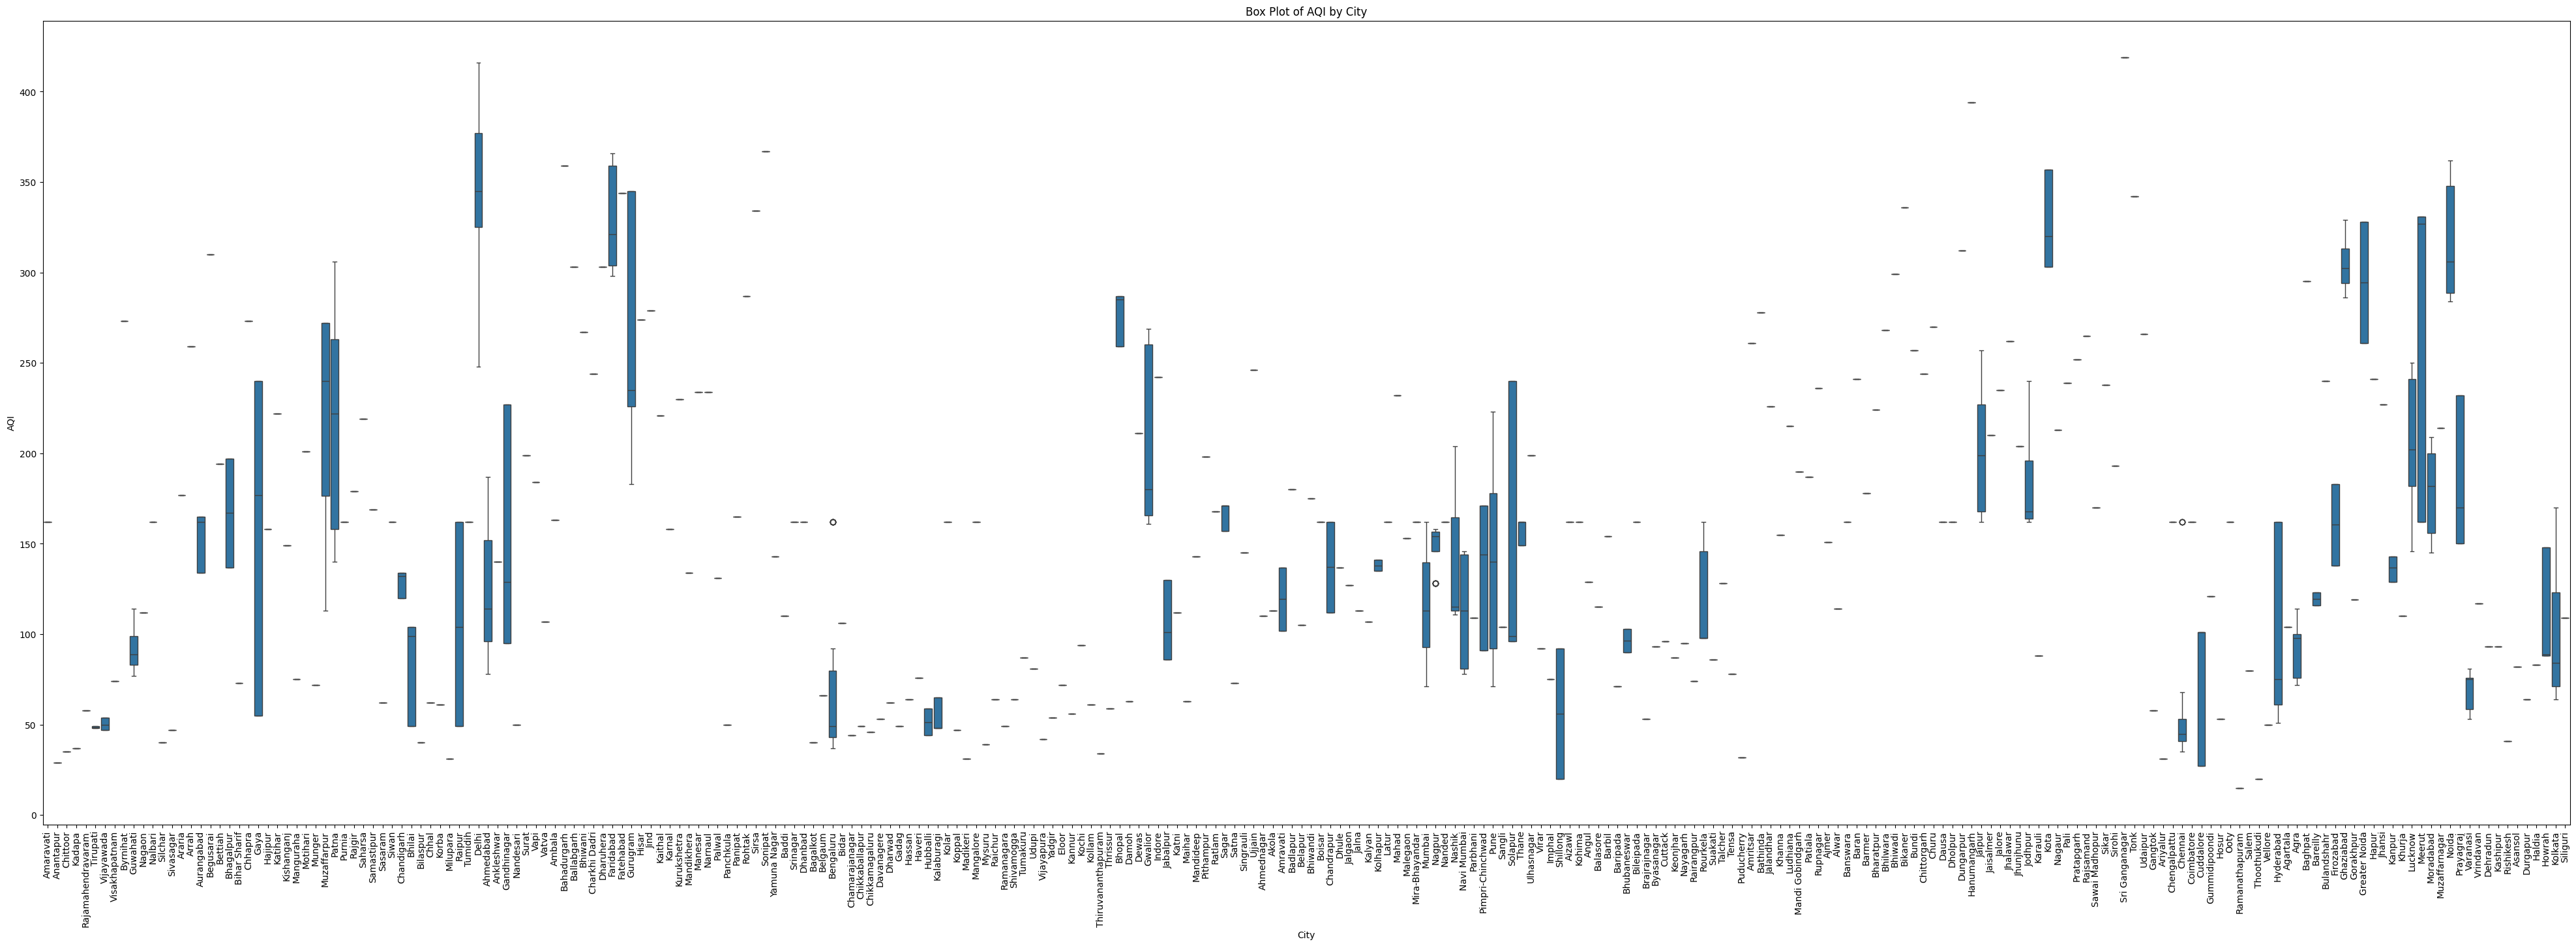

In [ ]:
plt.figure(figsize=(50, 16))
sns.boxplot(x='City', y='AQI', data=df)
plt.title('Box Plot of AQI by City')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

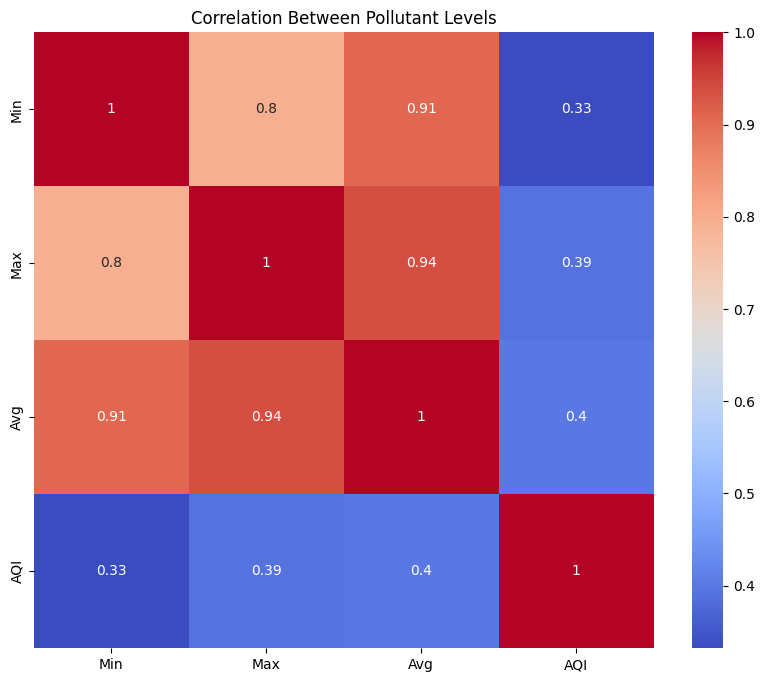

In [ ]:
plt.figure(figsize=(10, 8))
correlation = df[['Min', 'Max', 'Avg', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutant Levels')
plt.show()

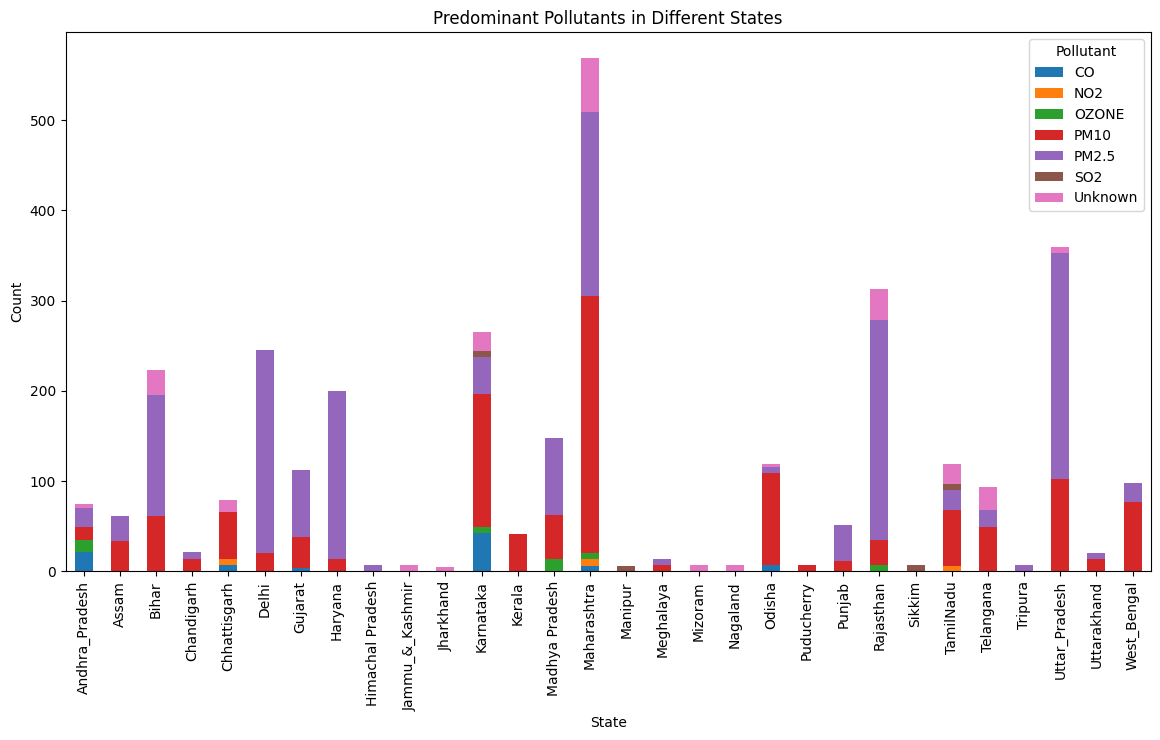

In [ ]:
predominant_pollutants = df.groupby(['State', 'Predominant Parameter']).size().unstack().fillna(0)
predominant_pollutants.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Predominant Pollutants in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Pollutant')
plt.show()

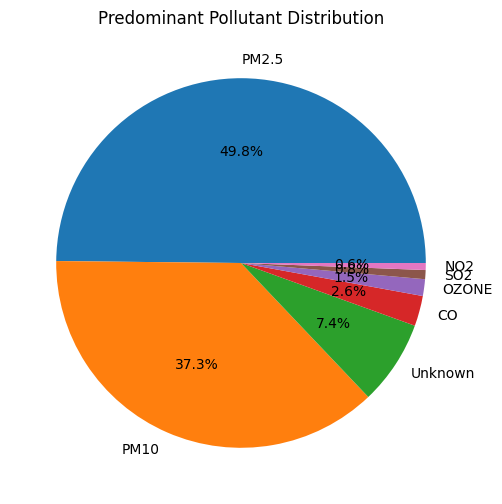

In [ ]:
predominant_pollutants = df['Predominant Parameter'].value_counts()
plt.figure(figsize=(10, 6))
predominant_pollutants.plot(kind='pie', autopct='%1.1f%%')
plt.title('Predominant Pollutant Distribution')
plt.ylabel('')
plt.show()

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 23.402408555943243
R^2 Score: 0.9974643414388643


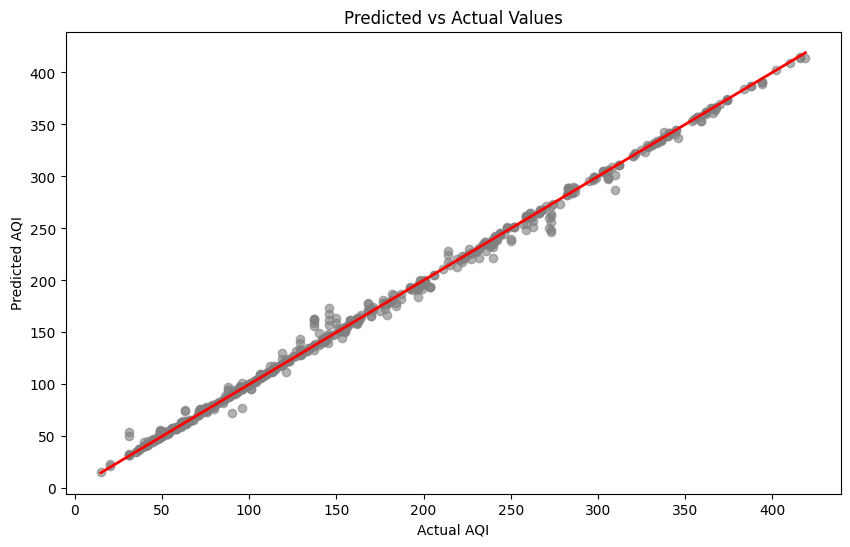

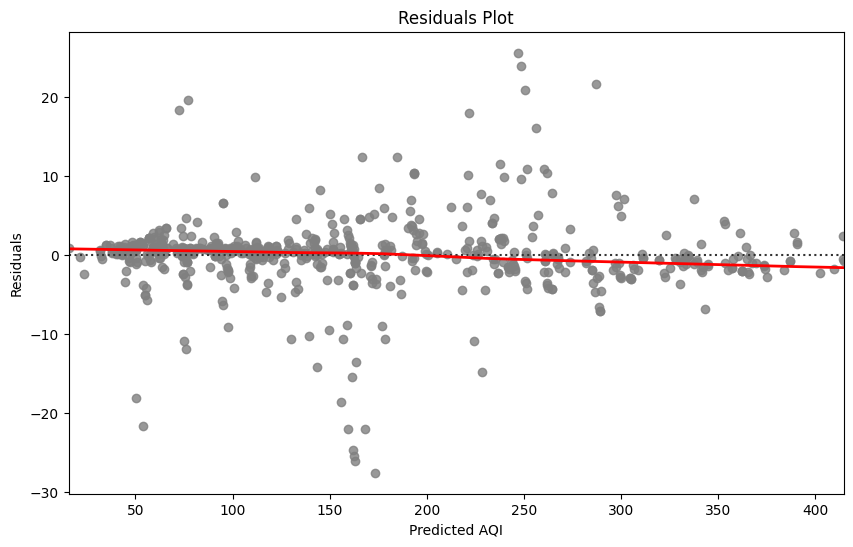

In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='grey', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="grey", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

In [ ]:
import pandas as pd

# Sample function to classify AQI
def classify_aqi(aqi_value):
    if aqi_value <= 50:
        return 'Good'
    elif aqi_value <= 100:
        return 'Moderate'
    elif aqi_value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi_value <= 200:
        return 'Unhealthy'
    elif aqi_value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Drop rows where AQI is NaN
df = df.dropna(subset=['AQI'])

# Apply the classification function
df['AQI_Category'] = df['AQI'].apply(classify_aqi)

# Print the DataFrame with the new 'AQI_Category' column
print(df[['AQI', 'AQI_Category']].head())

         AQI AQI_Category
0  162.00789    Unhealthy
1  162.00789    Unhealthy
2  162.00789    Unhealthy
3  162.00789    Unhealthy
4  162.00789    Unhealthy


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Make sure to load your actual dataset here

# Handle missing values if necessary (e.g., filling NaN values)
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)

# Assume 'Min', 'Max', 'Avg', etc. are features, and 'AQI' is the target
X = df[['Min', 'Max', 'Avg']]  # Select relevant features (you can add more features as necessary)
y = df['AQI']  # Target variable (AQI)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance (Optional but often helps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model using the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Now, to predict AQI for new values, we can use the trained model:
# Example new data (new Min, Max, Avg values)
new_data = pd.DataFrame({
    'Min': [30],  # Example minimum value
    'Max': [75],  # Example maximum value
    'Avg': [55]   # Example average value
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict the AQI for the new data
predicted_aqi = model.predict(new_data_scaled)

print(f"Predicted AQI for new data: {predicted_aqi[0]}")

Mean Squared Error: 8169.22811768408
R^2 Score: 0.11486148252823303
Predicted AQI for new data: 98.47
